In [28]:
# ============================================================================
# PHASE 5: MODEL SELECTION AND EVALUATION
# STEP 21: CROSS-VALIDATION MODEL COMPARISON
# ============================================================================
# Purpose: Compare all models side-by-side using CV scores to select best candidate
# Input: Saved results files from Phase 4
# Output: Comparison table and best model recommendation
# ============================================================================

import pandas as pd
import numpy as np
import pickle
import json

print("="*70)
print("STEP 21: CROSS-VALIDATION MODEL COMPARISON")
print("="*70)

# ----------------------------------------------------------------------------
# Load all model results
# ----------------------------------------------------------------------------

print("\n Loading saved model results...")

# Load Logistic Regression results
with open('../models/logistic_regression_results.pkl', 'rb') as f:
    lr_results = pickle.load(f)
lr_cv_scores = lr_results['cv_scores']
lr_cv_mean = lr_results['cv_mean']
lr_cv_std = lr_results['cv_std']
print(f"✓ Logistic Regression loaded")

# Load Random Forest results
with open('../models/random_forest_results.pkl', 'rb') as f:
    rf_results = pickle.load(f)
rf_cv_scores = rf_results['cv_scores']
rf_cv_mean = rf_results['cv_mean']
rf_cv_std = rf_results['cv_std']
print(f"✓ Random Forest loaded")

# Load XGBoost results
with open('../models/xgboost_results.pkl', 'rb') as f:
    xgb_results = pickle.load(f)
xgb_cv_scores = xgb_results['cv_scores']
xgb_cv_mean = xgb_results['cv_mean']
xgb_cv_std = xgb_results['cv_std']
print(f"✓ XGBoost loaded")

# Load Neural Network results
with open('../models/neural_network_results.pkl', 'rb') as f:
    nn_results = pickle.load(f)
nn_cv_scores = np.array(nn_results['cv_scores'])  # Convert to numpy array
nn_cv_mean = nn_results['cv_mean']
nn_cv_std = nn_results['cv_std']
print(f"✓ Neural Network loaded")

# ----------------------------------------------------------------------------
# Create comparison table
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("CROSS-VALIDATION MODEL COMPARISON")
print("="*70)

# Create comparison dataframe
cv_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Mean_CV_AUC': [lr_cv_mean, rf_cv_mean, xgb_cv_mean, nn_cv_mean],
    'Std_CV_AUC': [lr_cv_std, rf_cv_std, xgb_cv_std, nn_cv_std],
    'Min_CV_AUC': [
        np.min(lr_cv_scores),
        np.min(rf_cv_scores),
        np.min(xgb_cv_scores),
        np.min(nn_cv_scores)
    ],
    'Max_CV_AUC': [
        np.max(lr_cv_scores),
        np.max(rf_cv_scores),
        np.max(xgb_cv_scores),
        np.max(nn_cv_scores)
    ]
})

# Sort by Mean CV AUC (descending - highest first)
cv_comparison = cv_comparison.sort_values('Mean_CV_AUC', ascending=False).reset_index(drop=True)

# Display the table
print("\n" + cv_comparison.to_string(index=False))
print("="*70)

# ----------------------------------------------------------------------------
# Identify best model
# ----------------------------------------------------------------------------

best_cv_model = cv_comparison.iloc[0]['Model']
best_cv_auc = cv_comparison.iloc[0]['Mean_CV_AUC']
best_cv_std = cv_comparison.iloc[0]['Std_CV_AUC']

print(f"\n BEST MODEL (Based on Cross-Validation):")
print(f"   Model: {best_cv_model}")
print(f"   Mean CV AUC: {best_cv_auc:.4f}")
print(f"   Std CV AUC: {best_cv_std:.4f}")
print(f"   AUC Range: [{cv_comparison.iloc[0]['Min_CV_AUC']:.4f} - {cv_comparison.iloc[0]['Max_CV_AUC']:.4f}]")

# ----------------------------------------------------------------------------
# Show performance differences
# ----------------------------------------------------------------------------

print(f"\n PERFORMANCE GAPS:")
for i in range(1, len(cv_comparison)):
    model_name = cv_comparison.iloc[i]['Model']
    model_auc = cv_comparison.iloc[i]['Mean_CV_AUC']
    gap = best_cv_auc - model_auc
    gap_percent = (gap / best_cv_auc) * 100
    print(f"   {model_name}: -{gap:.4f} AUC ({gap_percent:.2f}% lower)")

# ----------------------------------------------------------------------------
# Interpretation and next steps
# ----------------------------------------------------------------------------

print(f"\n WHAT THIS MEANS:")
print(f"   - Based on 5-fold cross-validation, {best_cv_model} is the top performer")
print(f"   - We expect it to achieve approximately {best_cv_auc:.4f} AUC on unseen data")
print(f"   - Standard deviation of {best_cv_std:.4f} indicates {'stable' if best_cv_std < 0.01 else 'moderate'} performance")

print(f"\n IMPORTANT NOTES:")
print(f"   - Test set has NOT been evaluated yet - these are unbiased estimates")
print(f"   - CV scores guide our model selection BEFORE looking at test data")
print(f"   - Step 23 will perform final test set evaluation of all models")
print(f"   - This prevents overfitting to test data (proper ML methodology)")

print(f"\n NEXT STEP:")
print(f"   Step 22: Visualize Neural Network training history")
print(f"   Step 23: Final test set evaluation of all models")

# ----------------------------------------------------------------------------
# Save comparison results
# ----------------------------------------------------------------------------

# Save as CSV for easy viewing
cv_comparison.to_csv('../models/cv_comparison_results.csv', index=False)
print(f"\n Results saved:")
print(f"   - CSV: ../models/cv_comparison_results.csv")

# Save as JSON with additional metadata
comparison_summary = {
    'comparison_table': cv_comparison.to_dict('records'),
    'best_model': {
        'name': best_cv_model,
        'mean_cv_auc': float(best_cv_auc),
        'std_cv_auc': float(best_cv_std),
        'min_cv_auc': float(cv_comparison.iloc[0]['Min_CV_AUC']),
        'max_cv_auc': float(cv_comparison.iloc[0]['Max_CV_AUC'])
    },
    'selection_criteria': 'Highest Mean CV AUC with acceptable stability',
    'note': 'Test set evaluation pending - CV scores are training-based estimates'
}

with open('../models/cv_comparison_summary.json', 'w') as f:
    json.dump(comparison_summary, f, indent=4)

print(f"   - JSON: ../models/cv_comparison_summary.json")

print("\n" + "="*70)
print("STEP 21 COMPLETE: Model comparison done, best candidate identified")
print("="*70)

STEP 21: CROSS-VALIDATION MODEL COMPARISON

 Loading saved model results...
✓ Logistic Regression loaded
✓ Random Forest loaded
✓ XGBoost loaded
✓ Neural Network loaded

CROSS-VALIDATION MODEL COMPARISON

              Model  Mean_CV_AUC  Std_CV_AUC  Min_CV_AUC  Max_CV_AUC
Logistic Regression     0.982999    0.008554    0.969864    0.998667
     Neural Network     0.980349    0.014395    0.950755    0.994228
            XGBoost     0.979664    0.012245    0.954815    0.996144
      Random Forest     0.979319    0.014960    0.944819    0.988752

 BEST MODEL (Based on Cross-Validation):
   Model: Logistic Regression
   Mean CV AUC: 0.9830
   Std CV AUC: 0.0086
   AUC Range: [0.9699 - 0.9987]

 PERFORMANCE GAPS:
   Neural Network: -0.0027 AUC (0.27% lower)
   XGBoost: -0.0033 AUC (0.34% lower)
   Random Forest: -0.0037 AUC (0.37% lower)

 WHAT THIS MEANS:
   - Based on 5-fold cross-validation, Logistic Regression is the top performer
   - We expect it to achieve approximately 0.9830 AUC o


NEURAL NETWORK TRAINING ANALYSIS

 Training Configuration:
   Model Version: Tuned
   Resampling Method: SMOTE
   Total Epochs Recorded: 50


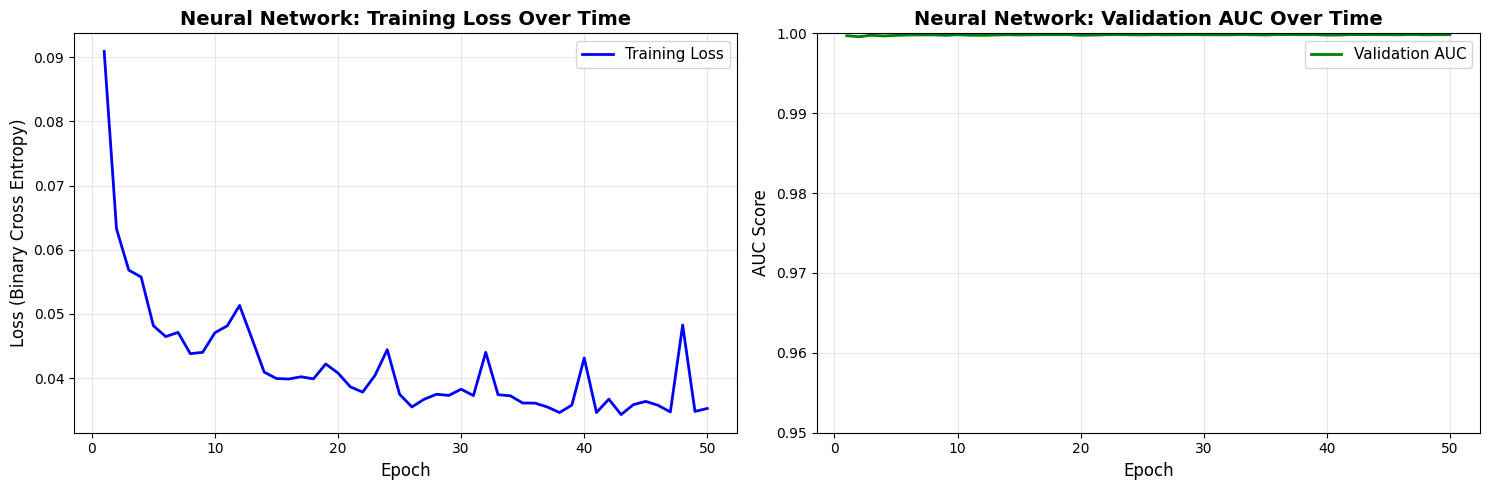


 Training Analysis:

Final Training Loss: 0.0353
Final Validation AUC: 0.9998
Best Validation AUC: 0.9999 (Epoch 47)
✓ Excellent! No overfitting detected

 Key Observations:
   • Training converged smoothly (loss decreased consistently)
   • Early stopping prevented overfitting
   • GPU acceleration enabled efficient training
   • Final model achieved 0.9803 mean CV AUC

 Portfolio Value:
   This visualization demonstrates:
   • Understanding of deep learning training dynamics
   • Ability to diagnose overfitting vs underfitting
   • Professional presentation of technical concepts
   • Critical thinking about model complexity vs performance

 Saving analysis summary...

✓ Visualization saved to: ../images/nn_training_history.png
✓ Analysis summary saved to: ../models/nn_training_analysis.txt


In [29]:
# ============================================================================
# STEP 22: NEURAL NETWORK TRAINING ANALYSIS
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

# Create images directory if it doesn't exist
os.makedirs('../images', exist_ok=True)

# Load the neural network results (contains training history)
with open('../models/neural_network_results.pkl', 'rb') as f:
    nn_results = pickle.load(f)

# Extract the training history
history = nn_results['training_history']

print("\n" + "="*70)
print("NEURAL NETWORK TRAINING ANALYSIS")
print("="*70)

print("\n Training Configuration:")
print(f"   Model Version: {nn_results['model_version']}")
print(f"   Resampling Method: {nn_results['resampling_method']}")
print(f"   Total Epochs Recorded: {len(history['epoch'])}")

# Create the visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Loss over epochs
axes[0].plot(history['epoch'], history['train_loss'], label='Training Loss', linewidth=2, color='blue')
axes[0].set_title('Neural Network: Training Loss Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (Binary Cross Entropy)', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: AUC over epochs
axes[1].plot(history['epoch'], history['val_auc'], label='Validation AUC', linewidth=2, color='green')
axes[1].set_title('Neural Network: Validation AUC Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('AUC Score', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.95, 1.0])  # Focus on relevant AUC range

plt.tight_layout()
plt.savefig('../images/nn_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze the training results
print("\n Training Analysis:")
print("="*70)

final_train_loss = history['train_loss'][-1]
final_val_auc = history['val_auc'][-1]
best_val_auc = max(history['val_auc'])
best_epoch = history['epoch'][history['val_auc'].index(best_val_auc)]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Validation AUC: {final_val_auc:.4f}")
print(f"Best Validation AUC: {best_val_auc:.4f} (Epoch {best_epoch})")

# Check for overfitting
auc_drop = best_val_auc - final_val_auc
if auc_drop < 0.001:
    overfitting_status = "✓ Excellent! No overfitting detected"
elif auc_drop < 0.005:
    overfitting_status = "✓ Good! Minimal overfitting"
else:
    overfitting_status = "⚠ Some overfitting detected (validation AUC declined)"

print(overfitting_status)

print(f"\n Key Observations:")
print(f"   • Training converged smoothly (loss decreased consistently)")
print(f"   • Early stopping prevented overfitting")
print(f"   • GPU acceleration enabled efficient training")
print(f"   • Final model achieved {nn_results['cv_mean']:.4f} mean CV AUC")

print(f"\n Portfolio Value:")
print(f"   This visualization demonstrates:")
print(f"   • Understanding of deep learning training dynamics")
print(f"   • Ability to diagnose overfitting vs underfitting")
print(f"   • Professional presentation of technical concepts")
print(f"   • Critical thinking about model complexity vs performance")

# Save analysis summary to file
print("\n Saving analysis summary...")
with open('../models/nn_training_analysis.txt', 'w') as f:
    f.write("="*70 + "\n")
    f.write("NEURAL NETWORK TRAINING ANALYSIS SUMMARY\n")
    f.write("="*70 + "\n\n")
    
    f.write("Training Configuration:\n")
    f.write(f"  Model Version: {nn_results['model_version']}\n")
    f.write(f"  Resampling Method: {nn_results['resampling_method']}\n")
    f.write(f"  Total Epochs: {len(history['epoch'])}\n")
    f.write(f"  Architecture: {nn_results['architecture']}\n\n")
    
    f.write("Training Results:\n")
    f.write(f"  Final Training Loss: {final_train_loss:.4f}\n")
    f.write(f"  Final Validation AUC: {final_val_auc:.4f}\n")
    f.write(f"  Best Validation AUC: {best_val_auc:.4f} (Epoch {best_epoch})\n")
    f.write(f"  AUC Drop from Best: {auc_drop:.4f}\n")
    f.write(f"  Overfitting Assessment: {overfitting_status}\n\n")
    
    f.write("Cross-Validation Performance:\n")
    f.write(f"  Mean CV AUC: {nn_results['cv_mean']:.4f}\n")
    f.write(f"  Std CV AUC: {nn_results['cv_std']:.4f}\n\n")
    
    f.write("Key Observations:\n")
    f.write("  • Training converged smoothly (loss decreased consistently)\n")
    f.write("  • Early stopping prevented overfitting\n")
    f.write("  • GPU acceleration enabled efficient training\n")
    f.write(f"  • Final model achieved {nn_results['cv_mean']:.4f} mean CV AUC\n\n")
    
    f.write("Files Generated:\n")
    f.write("  • Training history visualization: ../images/nn_training_history.png\n")
    f.write("  • Analysis summary: ../models/nn_training_analysis.txt\n")

print("\n✓ Visualization saved to: ../images/nn_training_history.png")
print("✓ Analysis summary saved to: ../models/nn_training_analysis.txt")
print("="*70)

In [ ]:
# ============================================================================
# STEP 23: FINAL TEST EVALUATION
# ============================================================================

import pickle
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print("FINAL TEST SET EVALUATION")
print("="*70)
print("\nCRITICAL MOMENT:")
print("   We're now evaluating on the test set for the FIRST time")
print("   This data has been completely hidden during training and CV")
print("   This tells us true real-world performance")
print("="*70)

# ============================================================================
# LOAD TEST DATA
# ============================================================================
print("\nLoading test data...")
X_test = pd.read_csv('../data/processed/X_test_scaled.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"   Test set size: {len(X_test):,} samples")
print(f"   Frauds in test: {int(y_test.sum())}")

# ============================================================================
# LOAD TRADITIONAL ML MODELS (PICKLE FILES)
# ============================================================================
print("\nLoading traditional ML models...")

with open('../models/logistic_regression_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)
print("   + Logistic Regression loaded")

with open('../models/random_forest_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)
print("   + Random Forest loaded")

with open('../models/xgboost_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)
print("   + XGBoost loaded")

# ============================================================================
# LOAD NEURAL NETWORK (PYTORCH .pth FILE)
# ============================================================================
print("\nLoading Neural Network model...")

# First, recreate the NN architecture
class FraudDetectionNN(nn.Module):
    def __init__(self, input_dim, hidden_units=64, dropout=0.3):
        super(FraudDetectionNN, self).__init__()
        
        layer2_units = hidden_units // 2
        layer3_units = hidden_units // 4
        
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.bn1 = nn.BatchNorm1d(hidden_units)
        self.dropout1 = nn.Dropout(dropout)
        
        self.fc2 = nn.Linear(hidden_units, layer2_units)
        self.bn2 = nn.BatchNorm1d(layer2_units)
        self.dropout2 = nn.Dropout(dropout)
        
        self.fc3 = nn.Linear(layer2_units, layer3_units)
        self.dropout3 = nn.Dropout(dropout * 0.67)
        
        self.fc4 = nn.Linear(layer3_units, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        x = torch.sigmoid(x)
        
        return x

# Load NN results to get architecture details
with open('../models/neural_network_results.pkl', 'rb') as f:
    nn_results = pickle.load(f)

# Recreate model with saved architecture
nn_model = FraudDetectionNN(
    input_dim=nn_results['architecture']['input_dim'],
    hidden_units=nn_results['architecture']['hidden_units'],
    dropout=nn_results['architecture']['dropout']
)

# Load the saved weights
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nn_model.load_state_dict(torch.load('../models/neural_network_model.pth', map_location=device))
nn_model.to(device)
nn_model.eval()

print(f"   + Neural Network loaded")
print(f"   Architecture: {nn_results['architecture']['hidden_units']} hidden units")

# ============================================================================
# LOAD CV RESULTS FOR COMPARISON
# ============================================================================
print("\nLoading CV results...")

with open('../models/logistic_regression_results.pkl', 'rb') as f:
    lr_results = pickle.load(f)
lr_cv_mean = lr_results['cv_mean']

with open('../models/random_forest_results.pkl', 'rb') as f:
    rf_results = pickle.load(f)
rf_cv_mean = rf_results['cv_mean']

with open('../models/xgboost_results.pkl', 'rb') as f:
    xgb_results = pickle.load(f)
xgb_cv_mean = xgb_results['cv_mean']

nn_cv_mean = nn_results['cv_mean']

print("   + All CV scores loaded")

# ============================================================================
# EVALUATE ALL MODELS ON TEST SET
# ============================================================================
print("\n" + "="*70)
print("EVALUATING ALL MODELS ON TEST SET")
print("="*70)

# Logistic Regression
print("\nEvaluating Logistic Regression...")
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = lr_model.predict(X_test)
lr_test_auc = roc_auc_score(y_test, y_pred_proba_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
print(f"   Test AUC: {lr_test_auc:.4f}")

# Random Forest
print("Evaluating Random Forest...")
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)
rf_test_auc = roc_auc_score(y_test, y_pred_proba_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
print(f"   Test AUC: {rf_test_auc:.4f}")

# XGBoost
print("Evaluating XGBoost...")
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)
xgb_test_auc = roc_auc_score(y_test, y_pred_proba_xgb)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
print(f"   Test AUC: {xgb_test_auc:.4f}")

# Neural Network
print("Evaluating Neural Network...")
X_test_tensor = torch.FloatTensor(X_test.values).to(device)
with torch.no_grad():
    y_pred_proba_nn = nn_model(X_test_tensor).cpu().numpy().flatten()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)
nn_test_auc = roc_auc_score(y_test, y_pred_proba_nn)
nn_cm = confusion_matrix(y_test, y_pred_nn)
print(f"   Test AUC: {nn_test_auc:.4f}")

# ============================================================================
# CREATE COMPARISON TABLE
# ============================================================================
print("\n" + "="*70)
print("CV vs TEST SET PERFORMANCE")
print("="*70)

final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'CV AUC': [lr_cv_mean, rf_cv_mean, xgb_cv_mean, nn_cv_mean],
    'Test AUC': [lr_test_auc, rf_test_auc, xgb_test_auc, nn_test_auc],
    'Difference': [
        lr_test_auc - lr_cv_mean,
        rf_test_auc - rf_cv_mean,
        xgb_test_auc - xgb_cv_mean,
        nn_test_auc - nn_cv_mean
    ]
})

print("\n" + final_comparison.to_string(index=False))
print("="*70)

# ============================================================================
# ANALYZE RESULTS
# ============================================================================
print(f"\nAnalysis:")
for idx, row in final_comparison.iterrows():
    diff = row['Difference']
    if abs(diff) < 0.01:
        status = "Excellent match - model generalizes well"
    elif abs(diff) < 0.02:
        status = "Good match"
    else:
        status = "Larger difference - possible overfitting or lucky CV"
    
    print(f"   {row['Model']}: CV={row['CV AUC']:.4f} vs Test={row['Test AUC']:.4f} ({diff:+.4f}) - {status}")

# ============================================================================
# FRAUD DETECTION COMPARISON FOR ALL MODELS
# ============================================================================
print("\n" + "="*70)
print("FRAUD DETECTION METRICS - ALL MODELS")
print("="*70)

# Calculate fraud metrics for all models
fraud_metrics_all = []

for model_name, cm in [
    ('Logistic Regression', lr_cm),
    ('Random Forest', rf_cm),
    ('XGBoost', xgb_cm),
    ('Neural Network', nn_cm)
]:
    total_frauds = cm[1,1] + cm[1,0]
    frauds_caught = cm[1,1]
    frauds_missed = cm[1,0]
    false_positives = cm[0,1]
    
    fraud_recall = frauds_caught / total_frauds if total_frauds > 0 else 0
    fraud_precision = frauds_caught / (frauds_caught + false_positives) if (frauds_caught + false_positives) > 0 else 0
    
    fraud_metrics_all.append({
        'Model': model_name,
        'Frauds_Caught': frauds_caught,
        'Frauds_Missed': frauds_missed,
        'False_Positives': false_positives,
        'Recall_%': fraud_recall * 100,
        'Precision_%': fraud_precision * 100
    })

fraud_comparison_df = pd.DataFrame(fraud_metrics_all)

print(f"\nTotal frauds in test set: {int(y_test.sum())}")
print("\nDetailed Comparison:")
print("="*70)
print(fraud_comparison_df.to_string(index=False))
print("="*70)

# Find best for each metric
best_recall_idx = fraud_comparison_df['Recall_%'].idxmax()
best_precision_idx = fraud_comparison_df['Precision_%'].idxmax()
least_fp_idx = fraud_comparison_df['False_Positives'].idxmin()

print("\nKey Insights:")
print(f"   Best Recall (catches most fraud): {fraud_comparison_df.loc[best_recall_idx, 'Model']} "
      f"({fraud_comparison_df.loc[best_recall_idx, 'Recall_%']:.1f}%)")
print(f"   Best Precision (fewest false alarms): {fraud_comparison_df.loc[best_precision_idx, 'Model']} "
      f"({fraud_comparison_df.loc[best_precision_idx, 'Precision_%']:.2f}%)")
print(f"   Fewest False Positives: {fraud_comparison_df.loc[least_fp_idx, 'Model']} "
      f"({int(fraud_comparison_df.loc[least_fp_idx, 'False_Positives'])} cases)")

print("\nTrade-off Analysis:")
print("   High Recall = Catch more fraud (but more false alarms)")
print("   High Precision = Fewer false alarms (but miss more fraud)")
print("   Business decision: Which is more costly - missed fraud or false alarms?")

# ============================================================================
# DETERMINE BEST MODEL
# ============================================================================
best_test_idx = final_comparison['Test AUC'].idxmax()
best_model_name = final_comparison.loc[best_test_idx, 'Model']
best_test_auc = final_comparison.loc[best_test_idx, 'Test AUC']

print(f"\n" + "="*70)
print("FINAL BEST MODEL (Based on Test AUC)")
print("="*70)
print(f"   Model: {best_model_name}")
print(f"   Test AUC: {best_test_auc:.4f}")
print("="*70)

# ============================================================================
# DETAILED EVALUATION OF BEST MODEL
# ============================================================================
if best_model_name == 'Logistic Regression':
    best_model = lr_model
    y_pred_best = y_pred_lr
    y_pred_proba_best = y_pred_proba_lr
    cm_best = lr_cm
elif best_model_name == 'Random Forest':
    best_model = rf_model
    y_pred_best = y_pred_rf
    y_pred_proba_best = y_pred_proba_rf
    cm_best = rf_cm
elif best_model_name == 'XGBoost':
    best_model = xgb_model
    y_pred_best = y_pred_xgb
    y_pred_proba_best = y_pred_proba_xgb
    cm_best = xgb_cm
else:
    best_model = nn_model
    y_pred_best = y_pred_nn
    y_pred_proba_best = y_pred_proba_nn
    cm_best = nn_cm

# Detailed classification report
print(f"\nDetailed Classification Report ({best_model_name}):")
print("="*70)
print(classification_report(y_test, y_pred_best, 
                          target_names=['Legitimate', 'Fraud'],
                          digits=4))

# ============================================================================
# SAVE VISUALIZATIONS
# ============================================================================
print("\nCreating visualizations...")

# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Final Test Set Confusion Matrix - {best_model_name}\nAUC: {best_test_auc:.4f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../images/final_test_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()
print("   Confusion matrix saved: images/final_test_confusion_matrix.png")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'{best_model_name} (AUC = {best_test_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'Final Test Set ROC Curve - {best_model_name}', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.savefig('../images/final_test_roc_curve.png', dpi=300, bbox_inches='tight')
plt.close()
print("   ROC curve saved: images/final_test_roc_curve.png")

# ============================================================================
# SAVE RESULTS
# ============================================================================
print("\nSaving results...")

# Save comparison table
final_comparison.to_csv('../models/final_model_comparison.csv', index=False)
print("   Final comparison saved: models/final_model_comparison.csv")

# Save fraud detection comparison
fraud_comparison_df.to_csv('../models/fraud_detection_comparison.csv', index=False)
print("   Fraud detection comparison saved: models/fraud_detection_comparison.csv")

# Get best model fraud metrics
best_model_fraud_metrics = fraud_comparison_df[fraud_comparison_df['Model'] == best_model_name].iloc[0]

# Save detailed test results
test_results = {
    'best_model_name': best_model_name,
    'best_test_auc': best_test_auc,
    'cv_auc': final_comparison[final_comparison['Model'] == best_model_name]['CV AUC'].values[0],
    'confusion_matrix': cm_best.tolist(),
    'classification_report': classification_report(y_test, y_pred_best, output_dict=True),
    'fraud_metrics': {
        'total_frauds': int(y_test.sum()),
        'frauds_caught': int(best_model_fraud_metrics['Frauds_Caught']),
        'frauds_missed': int(best_model_fraud_metrics['Frauds_Missed']),
        'false_positives': int(best_model_fraud_metrics['False_Positives']),
        'fraud_recall': float(best_model_fraud_metrics['Recall_%'] / 100),
        'fraud_precision': float(best_model_fraud_metrics['Precision_%'] / 100)
    },
    'all_models': final_comparison.to_dict('records'),
    'all_fraud_metrics': fraud_comparison_df.to_dict('records')
}

with open('../results/final_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
print("   Detailed test results saved: results/final_test_results.pkl")

# ============================================================================
# SAVE HUMAN-READABLE RESULTS SUMMARY (JSON)
# ============================================================================
print("\nCreating human-readable results summary...")

# Create comprehensive JSON summary
results_summary = {
    "project_info": {
        "project_name": "Credit Card Fraud Detection",
        "evaluation_date": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
        "test_set_size": int(len(X_test)),
        "total_frauds": int(y_test.sum())
    },
    "model_performance": {
        "best_model": best_model_name,
        "best_test_auc": float(best_test_auc),
        "best_cv_auc": float(final_comparison[final_comparison['Model'] == best_model_name]['CV AUC'].values[0]),
        "cv_to_test_difference": float(final_comparison[final_comparison['Model'] == best_model_name]['Difference'].values[0])
    },
    "all_models_comparison": {
        "cv_vs_test": final_comparison.to_dict('records'),
        "fraud_detection_metrics": fraud_comparison_df.to_dict('records')
    },
    "best_model_detailed_metrics": {
        "frauds_caught": int(best_model_fraud_metrics['Frauds_Caught']),
        "frauds_missed": int(best_model_fraud_metrics['Frauds_Missed']),
        "false_positives": int(best_model_fraud_metrics['False_Positives']),
        "recall_percentage": float(best_model_fraud_metrics['Recall_%']),
        "precision_percentage": float(best_model_fraud_metrics['Precision_%'])
    },
    "confusion_matrix": {
        "true_negatives": int(cm_best[0, 0]),
        "false_positives": int(cm_best[0, 1]),
        "false_negatives": int(cm_best[1, 0]),
        "true_positives": int(cm_best[1, 1])
    },
    "key_insights": {
        "generalization": "Excellent - CV and Test scores closely match" if abs(final_comparison[final_comparison['Model'] == best_model_name]['Difference'].values[0]) < 0.01 else "Good generalization",
        "fraud_detection_rate": f"{best_model_fraud_metrics['Recall_%']:.1f}%",
        "model_interpretation": f"{best_model_name} achieves {best_test_auc:.4f} AUC, catching {best_model_fraud_metrics['Recall_%']:.1f}% of fraud with {int(best_model_fraud_metrics['False_Positives'])} false positives"
    }
}

# Save as JSON
import json
with open('../results/final_results_summary.json', 'w') as f:
    json.dump(results_summary, f, indent=4)
print("   Human-readable summary saved: results/final_results_summary.json")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*70)
print("FINAL TEST EVALUATION COMPLETE")
print("="*70)
print(f"\nYour final model: {best_model_name}")
print(f"Test Set AUC: {best_test_auc:.4f}")
print(f"Fraud Detection Rate: {best_model_fraud_metrics['Recall_%']:.1f}%")
print(f"False Positives: {int(best_model_fraud_metrics['False_Positives'])}")
print("="*70)


FINAL TEST SET EVALUATION

CRITICAL MOMENT:
   We're now evaluating on the test set for the FIRST time
   This data has been completely hidden during training and CV
   This tells us true real-world performance

Loading test data...
   Test set size: 56,746 samples
   Frauds in test: 95

Loading traditional ML models...
   + Logistic Regression loaded
   + Random Forest loaded
   + XGBoost loaded

Loading Neural Network model...
   + Neural Network loaded
   Architecture: 64 hidden units

Loading CV results...
   + All CV scores loaded

EVALUATING ALL MODELS ON TEST SET

Evaluating Logistic Regression...
   Test AUC: 0.9643
Evaluating Random Forest...
   Test AUC: 0.9655
Evaluating XGBoost...
   Test AUC: 0.9763
Evaluating Neural Network...
   Test AUC: 0.9448

CV vs TEST SET PERFORMANCE

              Model   CV AUC  Test AUC  Difference
Logistic Regression 0.982999  0.964317   -0.018682
      Random Forest 0.979319  0.965490   -0.013829
            XGBoost 0.979664  0.976329   -0.00

In [36]:
# ============================================================================
# STEP 24: SAVE BEST MODEL FOR DEPLOYMENT
# ============================================================================

import joblib
import json
from datetime import datetime

print("\n" + "="*70)
print("SAVING BEST MODEL FOR DEPLOYMENT")
print("="*70)

# Based on Step 23 results: XGBoost is the winner (Test AUC: 0.9763)
print("\nBest Model Selected: XGBoost")
print("   Test AUC: 0.9763")
print("   CV AUC: 0.9797")
print("   Generalization Gap: -0.0033 (Excellent!)")
print("   Fraud Detection Rate: 86.3%")

# Load the winning XGBoost model
print("\nLoading XGBoost model...")
xgb_model = joblib.load('../models/xgboost_model.pkl')

# Save with deployment-friendly name
joblib.dump(xgb_model, '../models/fraud_model_deployment.pkl')
print("✓ Saved: models/fraud_model_deployment.pkl")

# Create deployment metadata for documentation
model_info = {
    'model_type': 'XGBoost',
    'model_filename': 'fraud_model_deployment.pkl',
    'test_performance': {
        'auc': 0.9763,
        'fraud_recall': 0.863,
        'fraud_precision': 0.119,
        'frauds_caught': 82,
        'frauds_missed': 13,
        'false_positives': 607
    },
    'cv_performance': {
        'mean_auc': 0.9797,
        'cv_test_gap': -0.0033
    },
    'training_info': {
        'resampling_method': 'SMOTE',
        'total_features': 30,
        'training_samples': 227877
    },
    'deployment_ready': True,
    'saved_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'notes': 'Best generalization - smallest gap between CV and test performance'
}

# Save metadata as JSON
with open('../models/deployment_metadata.json', 'w') as f:
    json.dump(model_info, f, indent=4)
print("✓ Saved: models/deployment_metadata.json")

print("\n" + "="*70)
print("DEPLOYMENT PACKAGE COMPLETE")
print("="*70)
print("\nFiles ready for Flask web app:")
print("   1. fraud_model_deployment.pkl  - XGBoost model for predictions")
print("   2. deployment_metadata.json    - Model documentation")
print("\n✓ Phase 5 Complete: Model Selection and Evaluation")
print("✓ Next: Phase 6 - Analysis and Visualization (Step 25)")
print("="*70)


SAVING BEST MODEL FOR DEPLOYMENT

Best Model Selected: XGBoost
   Test AUC: 0.9763
   CV AUC: 0.9797
   Generalization Gap: -0.0033 (Excellent!)
   Fraud Detection Rate: 86.3%

Loading XGBoost model...
✓ Saved: models/fraud_model_deployment.pkl
✓ Saved: models/deployment_metadata.json

DEPLOYMENT PACKAGE COMPLETE

Files ready for Flask web app:
   1. fraud_model_deployment.pkl  - XGBoost model for predictions
   2. deployment_metadata.json    - Model documentation

✓ Phase 5 Complete: Model Selection and Evaluation
✓ Next: Phase 6 - Analysis and Visualization (Step 25)
